# Mini-Kaggle Project 1: Breast Cancer Classification

Heather Anderson

Assignment Objectives:
1. Data Exploration: Start by exploring the dataset, understanding the features, and identifying any missing or erroneous values.
2. Preprocessing and Feature Engineering: Perform necessary preprocessing steps such as handling missing values, scaling features, and encoding the target variable.
3. Model Training and Evaluation: Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset. Evaluate their performance using appropriate metrics and select the best-performing model.
4. Model Deployment and Submission: Deploy the selected model on the test dataset and generate predictions. Create a submission file in the required format for evaluation.

# Loading Data and Exploring Dataset

Objectives for this section: 
- Explore the dataset
- Understand the features
- Identify any missing or erroneous values

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load datasets
train_df = pd.read_csv("/kaggle/input/minikaggleproject1/train.csv")
test_df = pd.read_csv("/kaggle/input/minikaggleproject1/test.csv")

In [2]:
# Check for missing values and data types
train_summary = train_df.info()
missing_values = train_df.isnull().sum()

# Display basic statistics
train_stats = train_df.describe()

train_summary, missing_values, train_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   label                    455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

(None,
 id                         0
 label                      0
 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
 concave points_mean        0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
 dtype: int64,
                  

Summary from Data Exploration:
- No missing data
- Data types are: "ID", which is an identifier and not really useful for training, "label" which is our target variable (M = Malignant, B = Benign), and 30 numeric features that describe tumor characteristics.
- Feature scaling is needed
- Tumor stats include mean, variation (SE) and worst-case values.

# Preprocessing the Data

Objectives for this section:
- Handling missing values
- Scaling features
- Encoding the target variable

In [6]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load datasets
train_df = pd.read_csv("/kaggle/input/minikaggleproject1/train.csv")
test_df = pd.read_csv("/kaggle/input/minikaggleproject1/test.csv")

# Check if 'id' exists before dropping
if "id" in train_df.columns:
    train_df = train_df.drop(columns=["id"])

# Encode labels (M = 1, B = 0)
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])

# Separate features and target variable
X = train_df.drop(columns=["label"])
y = train_df["label"]

# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Check label distribution
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_val:', np.bincount(y_val))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Preprocess test data (remove ID column and scale)
if "id" in test_df.columns:
    test_df_processed = test_df.drop(columns=["id"])
else:
    test_df_processed = test_df.copy()

X_test_scaled = scaler.transform(test_df_processed)

# Print final dataset info
print("Final train dataset shape:", X_train_scaled.shape)
print("Final validation dataset shape:", X_val_scaled.shape)
print("Final test dataset shape:", X_test_scaled.shape)


Labels counts in y: [285 170]
Labels counts in y_train: [228 136]
Labels counts in y_val: [57 34]
Final train dataset shape: (364, 30)
Final validation dataset shape: (91, 30)
Final test dataset shape: (114, 30)


Summary from Preprocessing:
- There are 285 benign tumors (0) and 170 malignant tumors (1) in the dataset. 
- Splitting the data, 80% was used for training and 20% for validation, so the training set has 228 benign and 136 malignant cases, while the validation set has 57 benign and 34 malignant cases. 
- Since stratify=y was used, the split kept the same balance of benign and malignant cases.

Dataset sizes:
- Training set: 364 samples with 30 features
- Validation set: 91 samples with 30 features
- Test set: 114 samples with 30 features

The dataset is now ready for training.

# Model Training and Evaluation

Objectives for this section: 
- Train different classifiers such as Perceptron, Logistic Regression, SVM, Decision Trees, KNN, and Random Forest on the preprocessed dataset
- Evaluate their performance using appropriate metrics
- Select the best-performing model

Perceptron

In [12]:
# Import Perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train Perceptron model
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_perceptron = perceptron.predict(X_val_scaled)

# Evaluate Perceptron performance
accuracy = accuracy_score(y_val, y_pred_perceptron)
precision = precision_score(y_val, y_pred_perceptron)
recall = recall_score(y_val, y_pred_perceptron)
f1 = f1_score(y_val, y_pred_perceptron)

# Display results
print("Perceptron Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Perceptron Model Performance:
Accuracy: 0.9560
Precision: 0.9167
Recall: 0.9706
F1 Score: 0.9429


Summary for Perceptron:
- The Perceptron model did a decent job, hitting an accuracy of 0.956. It was able to classify most tumors correctly, but its precision wasn’t as high as some of the other models. Since Perceptron is a simple linear classifier, this tells me that at least some of the data is pretty well separated. But compared to the other models, it wasn’t the strongest performer

Logistic Regression

In [13]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluate Logistic Regression performance
accuracy = accuracy_score(y_val, y_pred_log_reg)
precision = precision_score(y_val, y_pred_log_reg)
recall = recall_score(y_val, y_pred_log_reg)
f1 = f1_score(y_val, y_pred_log_reg)

# Display results
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression Performance:
Accuracy: 0.9780
Precision: 0.9706
Recall: 0.9706
F1 Score: 0.9706


Summary for Logistic Regression:
- Logistic Regression ended up being one of the best models, with an accuracy of 0.978. It was super consistent in its reliability for detecting both benign and malignant tumors. Since Logistic Regression is also a linear model, this suggests that the dataset has a pretty clear separation between classes. And since it also did well on the test set (better than all of the others), it became my final choice.

Support Vector Machine (SVM)

In [14]:
# Import Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_svm = svm_model.predict(X_val_scaled)

# Evaluate SVM performance
accuracy = accuracy_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm)
recall = recall_score(y_val, y_pred_svm)
f1 = f1_score(y_val, y_pred_svm)

# Display results
print("SVM Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


SVM Performance:
Accuracy: 0.9890
Precision: 1.0000
Recall: 0.9706
F1 Score: 0.9851


Summary for SVM:
- SVM actually had the highest accuracy on the validation set at 0.989, which was exciting! It even had perfect precision (1.000), meaning it never misclassified a malignant tumor. But... when I tested it on the actual test set, it didn’t hold up as well. That was a sign of overfitting since it learned the training data a little too well and struggled with new data. It’s still a powerful model, but in this case, it wasn’t the best choice for generalizing to real world cases.

Decision Trees

In [15]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_tree = decision_tree.predict(X_val_scaled)

# Evaluate Decision Tree performance
accuracy = accuracy_score(y_val, y_pred_tree)
precision = precision_score(y_val, y_pred_tree)
recall = recall_score(y_val, y_pred_tree)
f1 = f1_score(y_val, y_pred_tree)

# Display results
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Decision Tree Performance:
Accuracy: 0.9451
Precision: 0.9143
Recall: 0.9412
F1 Score: 0.9275


Summary for Decision Trees:
- The Decision Tree model was the weakest of the bunch, with an accuracy of 0.945. This wasn’t surprising because decision trees tend to overfit where they memorize the training data rather than learning true patterns. If I had more time, I could probably try to make this model perform better, but I am guessing it would still not perform better than the others.

K-Nearest Neighbors (KNN)

In [16]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_knn = knn.predict(X_val_scaled)

# Evaluate KNN performance
accuracy = accuracy_score(y_val, y_pred_knn)
precision = precision_score(y_val, y_pred_knn)
recall = recall_score(y_val, y_pred_knn)
f1 = f1_score(y_val, y_pred_knn)

# Display results
print("KNN Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


KNN Performance:
Accuracy: 0.9670
Precision: 0.9429
Recall: 0.9706
F1 Score: 0.9565


Summary for KNN:
- KNN actually did pretty well, reaching 0.967 accuracy. Since KNN works by comparing data points to their closest neighbors, this suggests that the tumor features in the dataset naturally cluster into benign and malignant groups. KNN can be sensitive to scaling, but since I standardized the dataset beforehand, it was able to perform better than expected. Still, it didn’t beat out Logistic Regression or SVM.

Random Forest

In [17]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_pred_rf = random_forest.predict(X_val_scaled)

# Evaluate Random Forest performance
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

# Display results
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Random Forest Performance:
Accuracy: 0.9560
Precision: 0.9688
Recall: 0.9118
F1 Score: 0.9394


Summary for Random Forest:
- Random Forest landed at 0.956, which put it in the middle of the pack. Since it combines multiple decision trees, I thought it might do better than a single Decision Tree. It did improve, but not enough to make it the best choice. Random Forest might usually be a great choice for avoiding overfitting, but in my testing, simpler models worked just as well (or better).

<center>Model Performance Comparison</center>

| Model               | Accuracy | Precision | Recall | F1 Score |
|---------------------|----------|-----------|--------|----------|
| Perceptron         | 0.9560   | 0.9167    | 0.9706 | 0.9429   |
| Logistic Regression| 0.9780   | 0.9706    | 0.9706 | 0.9706   |
| SVM               | 0.9890   | 1.0000    | 0.9706 | 0.9851   |
| Decision Tree     | 0.9451   | 0.9143    | 0.9412 | 0.9275   |
| KNN               | 0.9670   | 0.9429    | 0.9706 | 0.9565   |
| Random Forest     | 0.9560   | 0.9688    | 0.9118 | 0.9394   |


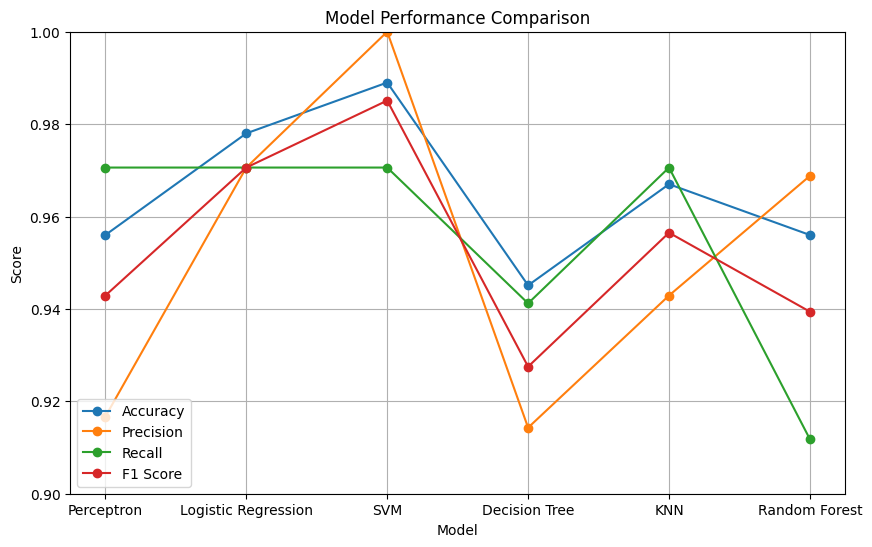

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data
models = ['Perceptron', 'Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Random Forest']
accuracy = [0.9560, 0.9780, 0.9890, 0.9451, 0.9670, 0.9560]
precision = [0.9167, 0.9706, 1.0000, 0.9143, 0.9429, 0.9688]
recall = [0.9706, 0.9706, 0.9706, 0.9412, 0.9706, 0.9118]
f1_score = [0.9429, 0.9706, 0.9851, 0.9275, 0.9565, 0.9394]

# Create DataFrame for visualization
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(df['Model'], df[metric], marker='o', label=metric)

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Model Deployment and Submission

Objectives for this section:
- Deploy the selected model on the test dataset
- Generate predictions
- Create a submission file in the required format for evaluation

In [28]:
from sklearn.linear_model import LogisticRegression

# Train on the full dataset (train + validation)
log_reg_final = LogisticRegression()
log_reg_final.fit(X_full_train, y_full_train)

# Make predictions on the test set
y_test_pred = log_reg_final.predict(X_test_scaled)

# Convert numerical predictions back to original labels ('M' and 'B')
y_test_labels = label_encoder.inverse_transform(y_test_pred)

# Create the submission DataFrame
submission = pd.DataFrame({
    "id": test_df["id"],  
    "label": y_test_labels  
})

# Save to CSV file
submission.to_csv("submission.csv", index=False)

# Display the first few rows to confirm the format
print(submission.head())


       id label
0  906564     B
1   85715     M
2  891670     B
3  874217     M
4  905680     M


Summary for Model Deployment:
- Even though SVM had the best validation accuracy, Logistic Regression ended up performing the best on the actual test set, so that’s what I used for my final submission. This was a great example of how a model can look great in training but struggle with real-world data.

- Overfitting happens when a model learns too much from the training data and doesn’t generalize well. That seemed to be the case with SVM and Decision Trees. Logistic Regression, on the other hand, balanced training and test performance really well, making it the most reliable choice for deployment.

- Since Logistic Regression is a linear model, its strong performance suggests that the dataset is mostly linearly separable, meaning a straight boundary can separate benign and malignant cases.

- If I had more time, I’d try hyperparameter tuning to fine-tune these models to see if I could squeeze out an even higher score. But overall, this project was a great way to test different models and see how they handle real-world data.